In [117]:
import rul_datasets
import rul_adapt
import numpy as np
import matplotlib.pyplot as plt

In [132]:
def horizontal(x):
    return x[:, :, 0, None]

def norm(x):
    return np.linalg.norm(x, axis=2, keepdims=True)


def get_mean_rms(runs, transform):
    return np.mean(rul_adapt.approach.tbigru.rms(transform(np.concatenate(runs))))


def get_deadtime(runs):
    return int(np.mean([x.shape[0] for x in runs]) * 0.1)


def get_fttp(runs, thresh, deadtime=0, transform=horizontal):
    return [_get_fttp_for_run(r, thresh, deadtime, transform) for r in runs]


def _get_fttp_for_run(r, thresh, deadtime, transform):
    return np.argmax(rul_adapt.approach.tbigru.rms(transform(r)) > thresh) + deadtime


def plot_fttp(runs, threshold, deadtime=0, transform=horizontal):
    for r in runs:
        plt.yscale("log")
        plt.plot(rul_adapt.approach.tbigru.rms(transform(r)), alpha=0.5)
    plt.axhline(threshold, color="red")
    plt.axvline(deadtime, color="green")

In [134]:
def get_dataset_fttp(reader, transform):
    reader.prepare_data()
    train, _ = reader.load_split("dev")
    val, _ = reader.load_split("val")
    test, _ = reader.load_split("test")

    mean_train_rms = get_mean_rms(train, transform)
    patience = get_deadtime(train)
    train_fttp = get_fttp(train, mean_train_rms, patience, transform)
    print(f"Mean Training RMS: {mean_train_rms}")
    print(f"Deadtime for run-in period: {patience}")
    print(f"Training fttp: {train_fttp}")
    plot_fttp(train, mean_train_rms, patience, transform)
    plt.show()

    plot_fttp(val, mean_train_rms, patience, transform)
    print(f"Validation fttp: {get_fttp(val, mean_train_rms, patience, transform)}")
    plt.show()

    plot_fttp(test, mean_train_rms, patience, transform)
    print(f"Test fttp: {get_fttp(test, mean_train_rms, patience, transform)}")

Mean Training RMS: 1.1641332162433555
Deadtime for run-in period: 183
Training fttp: [964, 220]


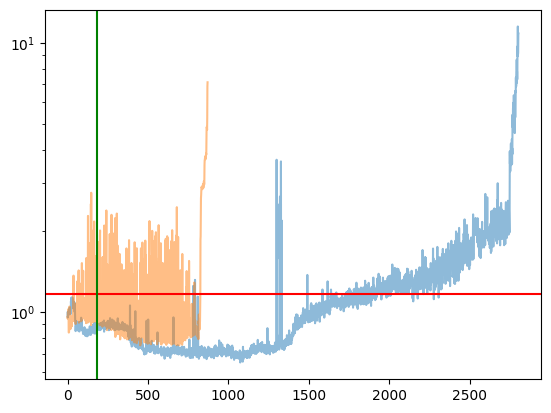

Validation fttp: [1803]


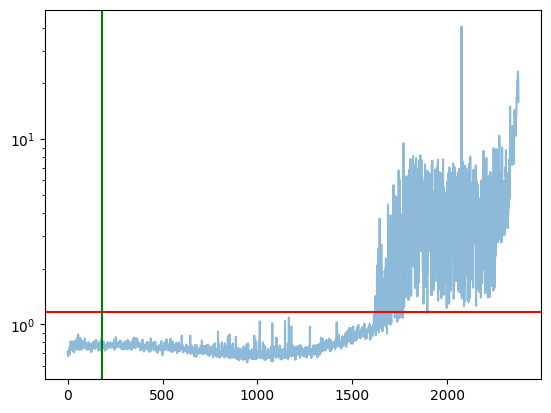

Test fttp: [230, 342, 1816, 197]


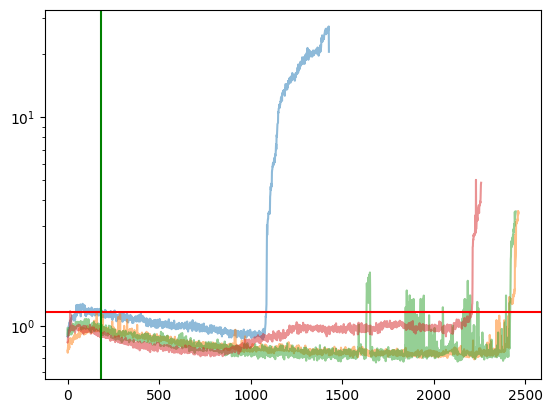

In [135]:
fd1 = rul_datasets.FemtoReader(fd=1)
get_dataset_fttp(fd1, transform=norm)

Mean Training RMS: 1.3269054222241832
Deadtime for run-in period: 85
Training fttp: [118, 352]


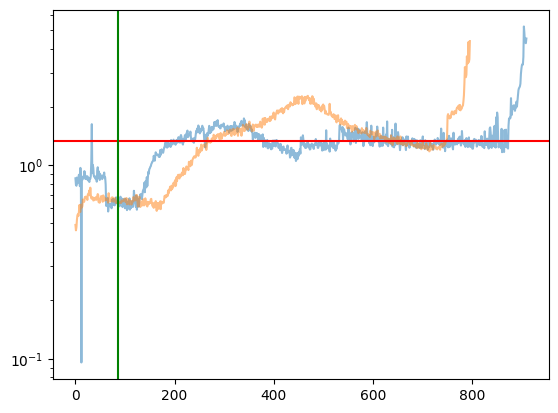

Validation fttp: [349]


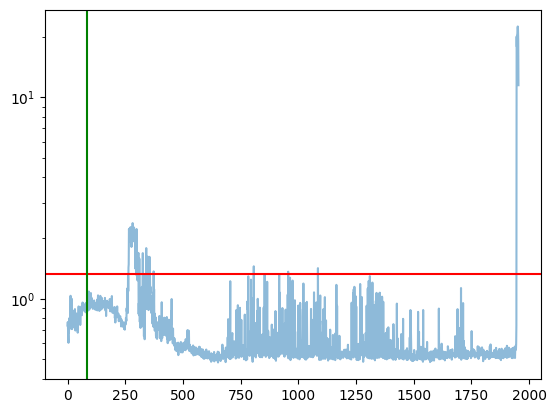

Test fttp: [828, 88, 772, 247]


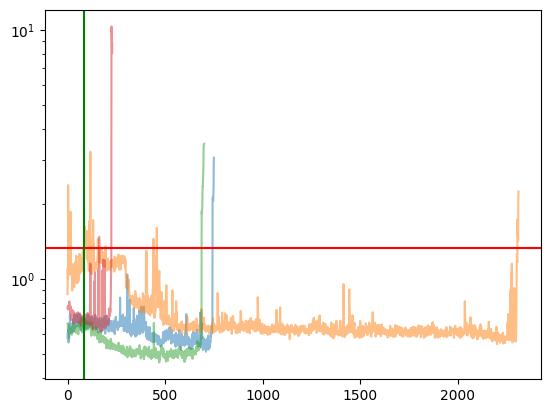

In [139]:
fd2 = rul_datasets.FemtoReader(fd=2)
get_dataset_fttp(fd2, transform=norm)

Mean Training RMS: 1.2492704987031877
Deadtime for run-in period: 51
Training fttp: [51]


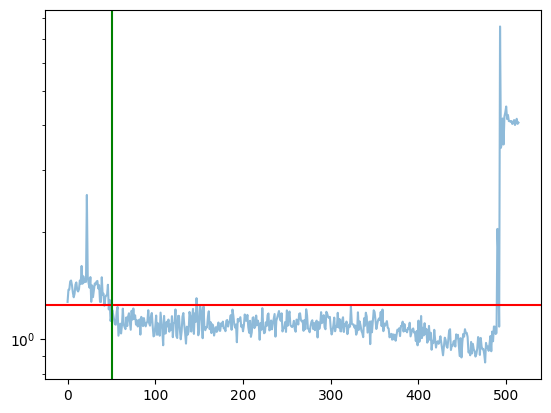

Validation fttp: [59]


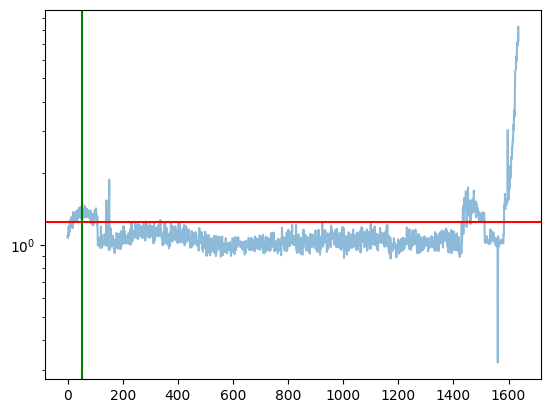

Test fttp: [130]


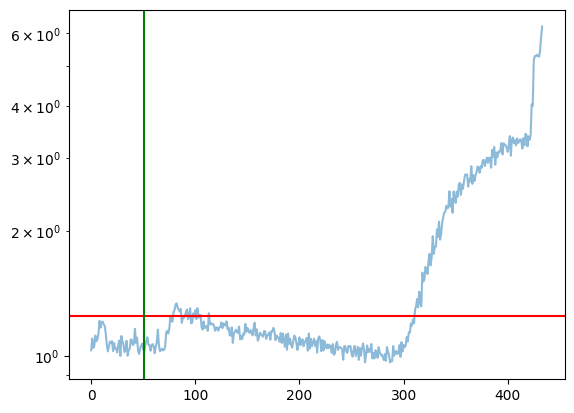

In [137]:
fd3 = rul_datasets.FemtoReader(fd=3)
get_dataset_fttp(fd3, transform=norm)

/home/tilman/Programming/rul-adapt/.venv/lib/python3.8/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 1.1.3 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/tilman/Programming/rul-adapt/.venv/lib/python3.8/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 1.1.3 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/tilman/Programming/rul-adapt/.venv/lib/python3.8/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 1.1.3 when using version 1

Mean Training RMS: 1.1503172963846975
Deadtime for run-in period: 14
Training fttp: [97, 76]


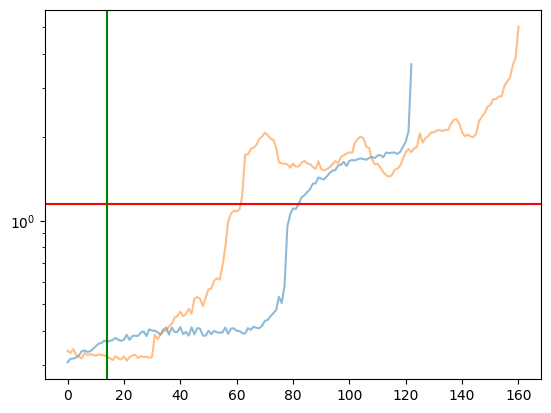

Validation fttp: [153]


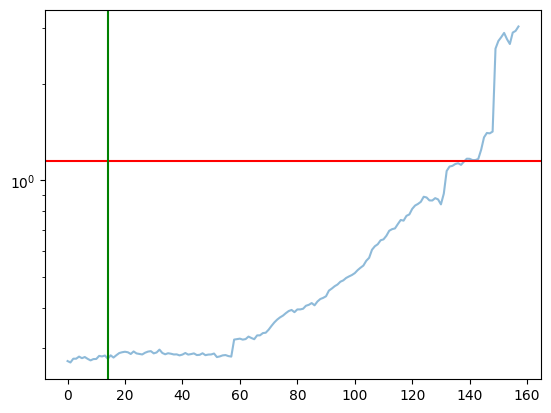

Test fttp: [135, 53]


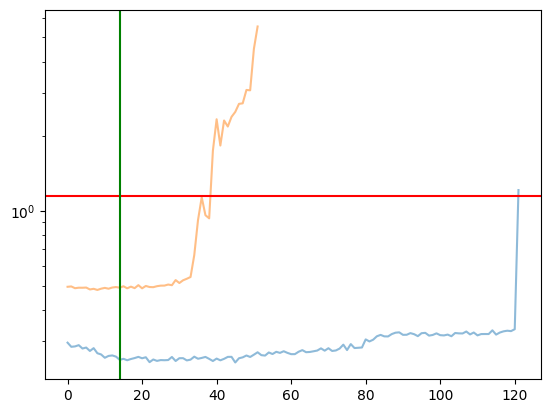

In [138]:
fd1 = rul_datasets.XjtuSyReader(fd=1)
get_dataset_fttp(fd1, transform=norm)

/home/tilman/Programming/rul-adapt/.venv/lib/python3.8/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 1.1.3 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/tilman/Programming/rul-adapt/.venv/lib/python3.8/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 1.1.3 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/tilman/Programming/rul-adapt/.venv/lib/python3.8/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 1.1.3 when using version 1

Mean Training RMS: 0.6239879039193582
Deadtime for run-in period: 32
Training fttp: [486, 88]


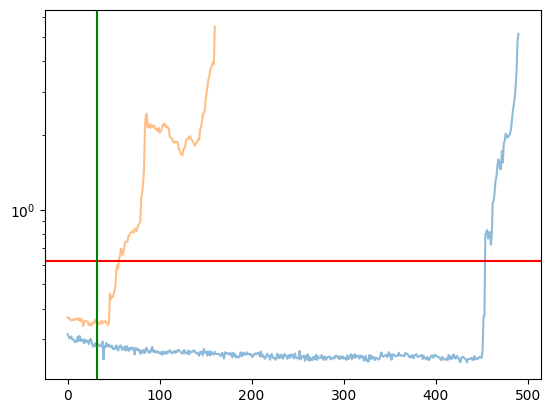

Validation fttp: [355]


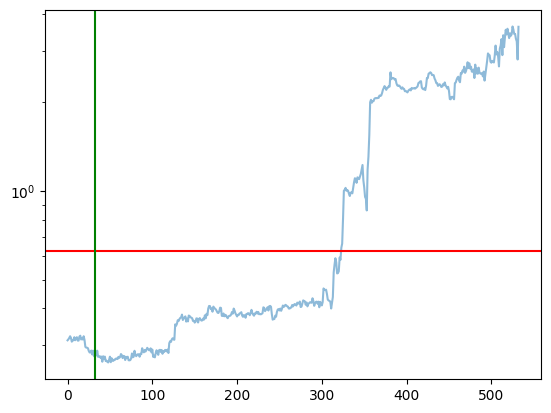

Test fttp: [62, 32]


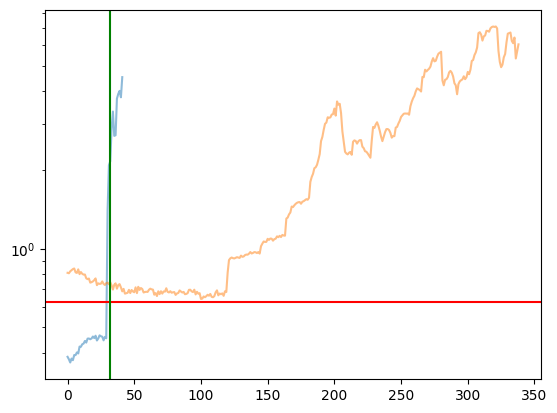

In [130]:
fd2 = rul_datasets.XjtuSyReader(fd=2)
get_dataset_fttp(fd2)

/home/tilman/Programming/rul-adapt/.venv/lib/python3.8/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 1.1.3 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/tilman/Programming/rul-adapt/.venv/lib/python3.8/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 1.1.3 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/tilman/Programming/rul-adapt/.venv/lib/python3.8/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 1.1.3 when using version 1

Mean Training RMS: 0.8361081828405326
Deadtime for run-in period: 251
Training fttp: [2658, 261]


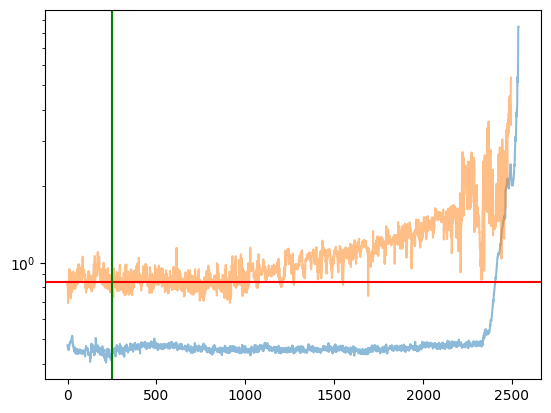

Validation fttp: [593]


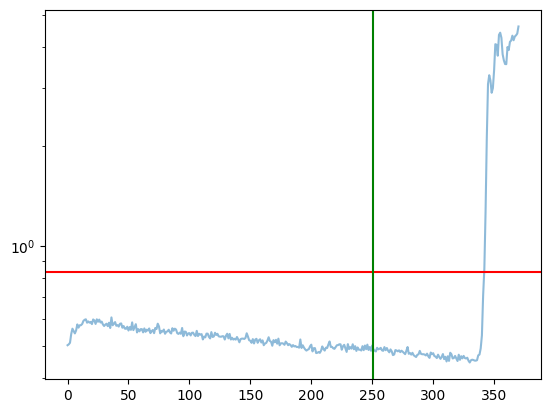

Test fttp: [1673, 257]


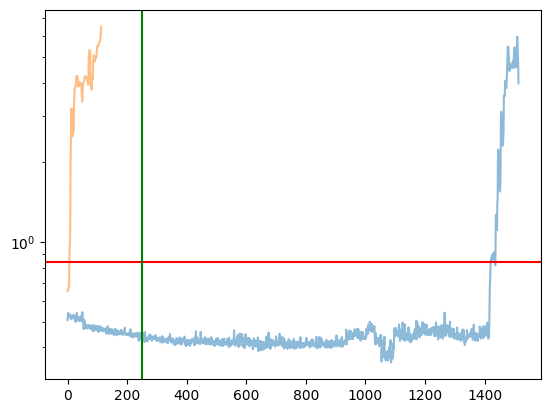

In [131]:
fd3 = rul_datasets.XjtuSyReader(fd=3)
get_dataset_fttp(fd3)